# Single-cell RNA Sequencing of Fibrotic Skin Disease Dermis Tissue and Normal Dermise Tissue: Analysis

**Data Source Acknowledgment:**
The dataset is sourced from GSE163973. This dataset comprises single-cell RNA sequencing data from keloid (nsample=3) and normal scar(nsample=3).

Reference: Deng CC, Hu YF, Zhu DH, Cheng Q et al. Single-cell RNA-seq reveals fibroblast heterogeneity and increased mesenchymal fibroblasts in human fibrotic skin diseases. Nat Commun 2021 Jun 17;12(1):3709. PMID: 34140509

It's essential to emphasize that this dataset is exclusively utilized for Python practice purposes within this repository. This notebook will use this dataset to practice data cleaning techniques and clustering.

In [2]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import seaborn as sns
import scvi
import os

## 1. Data combining

In [11]:
all_files = []
for file in os.listdir('./'):
    if file.endswith('.h5ad'):
        all_files.append(file)
print(all_files)

['NF2.h5ad', 'KF1.h5ad', 'NF3.h5ad', 'KF3.h5ad', 'NF1.h5ad', 'KF2.h5ad']


In [14]:
list_adata = []

for file in all_files:
    read_adata = sc.read_h5ad(file)
    list_adata.append(read_adata)

In [17]:
print(list_adata)

[AnnData object with n_obs × n_vars = 7681 × 21176
    obs: 'sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', AnnData object with n_obs × n_vars = 8171 × 21000
    obs: 'sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', AnnData object with n_obs × n_vars = 5402 × 20348
    obs: 'sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropou

In [22]:
adata = sc.concat(list_adata)

/Applications/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
adata

AnnData object with n_obs × n_vars = 43986 × 18363
    obs: 'sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'

In [25]:
#Makes the index unique
adata.obs_names_make_unique()

In [27]:
adata.n_obs

43986

In [29]:
adata.var_names_make_unique()

In [31]:
adata.n_vars

18363

In [33]:
adata.X

<43986x18363 sparse matrix of type '<class 'numpy.float32'>'
	with 96460049 stored elements in Compressed Sparse Row format>

In [34]:
adata.obs

,sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
AAACCCAAGCAGGCTA-1,NF2,False,2435,2435,9606.0,0.0,0.0,2137.0,22.246513
AAACCCAAGCTGAAAT-1,NF2,False,3560,3560,14965.0,0.0,0.0,1584.0,10.584698
AAACCCAAGTAATTGG-1,NF2,False,1712,1712,5765.0,0.0,0.0,1978.0,34.310493
AAACCCACAGATACTC-1,NF2,False,2468,2467,7935.0,0.0,0.0,1308.0,16.483931
AAACCCACAGTAACGG-1,NF2,False,2266,2266,8855.0,0.0,0.0,2532.0,28.594013
...,...,...,...,...,...,...,...,...,...
TTTGTTGCATCGCTCT-1,KF2,False,1605,1604,5084.0,0.0,0.0,1261.0,24.803305
TTTGTTGCATGCCGGT-1,KF2,False,2285,2284,7705.0,0.0,0.0,1746.0,22.660610
TTTGTTGTCGCAGAGA-1,KF2,False,1534,1533,3494.0,0.0,0.0,535.0,15.311964
TTTGTTGTCGTTTACT-1,KF2,False,1379,1379,3471.0,0.0,0.0,709.0,20.426390


In [36]:
#save combined adata
adata.write_h5ad('combined.h5ad')

The combined data is reloaded.

In [48]:
adata = sc.read_h5ad('combined.h5ad')

In [49]:
adata

AnnData object with n_obs × n_vars = 43986 × 18363
    obs: 'sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'

In [50]:
adata.obs.groupby('sample').count()

,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
sample,,,,,,,,
KF1,8171,8171,8171,8171,8171,8171,8171,8171
KF2,7401,7401,7401,7401,7401,7401,7401,7401
KF3,7711,7711,7711,7711,7711,7711,7711,7711
NF1,7620,7620,7620,7620,7620,7620,7620,7620
NF2,7681,7681,7681,7681,7681,7681,7681,7681
NF3,5402,5402,5402,5402,5402,5402,5402,5402


In [52]:
sc.pp.filter_genes(adata, min_cells = 3)

In [53]:
adata

AnnData object with n_obs × n_vars = 43986 × 18363
    obs: 'sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [54]:
adata.var.sort_values('n_cells')

,n_cells
AANAT,22
C14orf178,22
C6orf58,22
AC009097.4,23
FAM222A-AS1,23
...,...
MT-CO2,43746
MT-ND4,43747
MT-CYB,43752
MT-CO3,43783


In [55]:
#after combing data, we need correct for the batch effect
#scvi will use for integration
#first, save raw data (non-log normalized data) in the layer called 'count'
#scvi will use counts layer!!!
adata.layers['counts'] = adata.X.copy()

In [56]:
#normalization
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)

#save log normalized data to raw => this is used for other function and module
adata.raw = adata

In [57]:
adata.obs

,sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
AAACCCAAGCAGGCTA-1,NF2,False,2435,2435,9606.0,0.0,0.0,2137.0,22.246513
AAACCCAAGCTGAAAT-1,NF2,False,3560,3560,14965.0,0.0,0.0,1584.0,10.584698
AAACCCAAGTAATTGG-1,NF2,False,1712,1712,5765.0,0.0,0.0,1978.0,34.310493
AAACCCACAGATACTC-1,NF2,False,2468,2467,7935.0,0.0,0.0,1308.0,16.483931
AAACCCACAGTAACGG-1,NF2,False,2266,2266,8855.0,0.0,0.0,2532.0,28.594013
...,...,...,...,...,...,...,...,...,...
TTTGTTGCATCGCTCT-1,KF2,False,1605,1604,5084.0,0.0,0.0,1261.0,24.803305
TTTGTTGCATGCCGGT-1,KF2,False,2285,2284,7705.0,0.0,0.0,1746.0,22.660610
TTTGTTGTCGCAGAGA-1,KF2,False,1534,1533,3494.0,0.0,0.0,535.0,15.311964
TTTGTTGTCGTTTACT-1,KF2,False,1379,1379,3471.0,0.0,0.0,709.0,20.426390


In [58]:
# i will use ['sample', [total_counts], 'pct_count_mt', 'pct_count_ribo'] for data setup
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [59]:
#initialize the model
model = scvi.model.SCVI(adata)

In [60]:
#train the model
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Applications/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 182/182: 100%|████████████████████████████████████████████████████████████████████████████████████████| 182/182 [6:06:37<00:00, 116.85s/it, v_num=1, train_loss_step=5.9e+3, train_loss_epoch=6.26e+3]

`Trainer.fit` stopped: `max_epochs=182` reached.


Epoch 182/182: 100%|████████████████████████████████████████████████████████████████████████████████████████| 182/182 [6:06:37<00:00, 120.87s/it, v_num=1, train_loss_step=5.9e+3, train_loss_epoch=6.26e+3]


In [64]:
#shape (43986, 10): this is scvi array that represent our data
#i will use this for clustering and umap
model.get_latent_representation()

array([[-2.5702324 ,  0.10354878, -0.00508034, ..., -0.6358237 ,
         1.7631457 , -3.5010993 ],
       [-0.8058276 ,  0.7021928 , -2.0645375 , ...,  0.6433899 ,
         3.6784394 , -2.2377553 ],
       [ 0.5603895 , -2.4698234 , -2.5694823 , ...,  0.10224101,
         1.8133818 , -2.5776134 ],
       ...,
       [-0.10140193, -0.6041158 ,  2.864667  , ..., -0.27561292,
        -2.0572462 ,  1.0896723 ],
       [-1.9886589 ,  1.4726973 ,  0.5939466 , ..., -2.6840498 ,
        -0.9707268 , -1.5522853 ],
       [-0.87226605,  1.233439  ,  2.7794943 , ..., -0.70799685,
         1.185065  ,  1.0858492 ]], dtype=float32)

In [65]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [66]:
adata.obsm

AxisArrays with keys: _scvi_extra_categorical_covs, _scvi_extra_continuous_covs, X_scVI

In [67]:
#get the scvi normalized expression
model.get_normalized_expression(library_size = 1e4)

,AL627309.1,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.1,SAMD11,NOC2L,KLHL17,PLEKHN1,...,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AC011043.1,AC007325.4,AC240274.1
AAACCCAAGCAGGCTA-1,0.002865,0.038855,0.036937,0.027167,0.007199,0.024650,0.136958,0.222016,0.008023,0.004944,...,25.461178,1.623964,29.336830,4.533995,0.083569,44.577168,0.003231,0.028538,0.027235,0.022290
AAACCCAAGCTGAAAT-1,0.003279,0.021577,0.048851,0.031954,0.007414,0.005175,0.045151,0.119727,0.007540,0.004703,...,24.027824,1.815975,32.853043,4.973823,0.034909,51.085255,0.001608,0.026342,0.052212,0.041194
AAACCCAAGTAATTGG-1,0.002838,0.037833,0.025342,0.035141,0.021477,0.009845,0.176404,0.187676,0.010557,0.008290,...,20.847179,1.884872,24.193693,5.586757,0.034154,39.242672,0.012640,0.046142,0.065233,0.038813
AAACCCACAGATACTC-1,0.006489,0.057971,0.040456,0.057143,0.018905,0.019174,0.097541,0.189258,0.015285,0.013521,...,23.234589,1.936033,29.356472,5.554376,0.071875,44.932552,0.006329,0.053030,0.040946,0.100874
AAACCCACAGTAACGG-1,0.007837,0.024468,0.007903,0.053079,0.027312,0.006452,0.021722,0.209077,0.019280,0.207615,...,62.710373,2.947829,65.256615,14.182407,0.304161,124.992264,0.007890,0.022947,0.083794,0.055182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCATCGCTCT-1,0.002923,0.035281,0.002514,0.029563,0.011849,0.006557,0.006647,0.228383,0.008149,0.017537,...,105.363617,7.886045,85.355324,19.154833,0.312171,87.145409,0.001407,0.017559,0.014206,0.044758
TTTGTTGCATGCCGGT-1,0.002550,0.038376,0.004079,0.017073,0.012623,0.004613,0.020628,0.590801,0.008512,0.015940,...,125.919449,5.617393,77.138725,16.388985,0.580757,105.219063,0.001050,0.028095,0.017997,0.020151
TTTGTTGTCGCAGAGA-1,0.004989,0.046404,0.004449,0.076806,0.012483,0.004214,0.007449,0.284770,0.024230,0.052885,...,101.413651,6.646053,93.288048,18.080442,0.331911,101.679482,0.006664,0.032389,0.037716,0.073102
TTTGTTGTCGTTTACT-1,0.002420,0.285770,0.029066,0.034714,0.008970,0.017706,0.013472,0.393664,0.017522,0.016697,...,98.088821,4.237762,70.605354,9.628093,0.267505,86.819611,0.002543,0.048612,0.039015,0.023847


In [68]:
#save it at the layer instead of overriding the default raw values
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [69]:
adata.layers['scvi_normalized']

array([[0.00277575, 0.04053569, 0.03930829, ..., 0.02875924, 0.02625232,
        0.02196082],
       [0.00348748, 0.02193483, 0.05125887, ..., 0.02697577, 0.05238254,
        0.04443127],
       [0.0027205 , 0.03671839, 0.02614119, ..., 0.04400437, 0.0665928 ,
        0.04038272],
       ...,
       [0.00514762, 0.04678607, 0.00432521, ..., 0.03661203, 0.03435035,
        0.06929974],
       [0.00271023, 0.28388935, 0.02906524, ..., 0.04801439, 0.03919115,
        0.02705935],
       [0.00289364, 0.04944216, 0.00584231, ..., 0.02365862, 0.01851735,
        0.02155225]], dtype=float32)

In [70]:
#run neighbor function
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [71]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


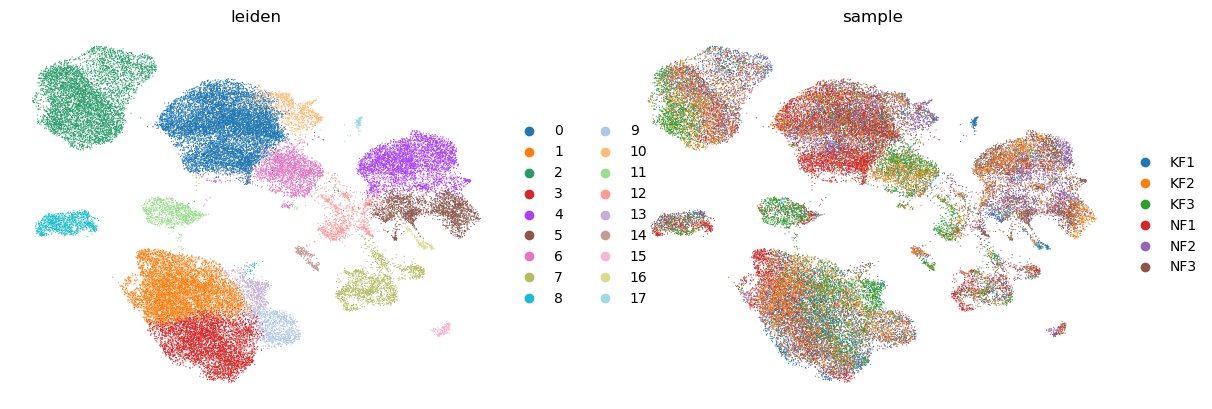

In [73]:
sc.pl.umap(adata, color = ['leiden', 'sample'], frameon = False)

In [75]:
adata.write_h5ad('combined_scvi.h5ad')

# 2. Find markers and label cell types